In [25]:
import pandas as pd
import numpy as np 

import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
# Veriyi oku
df = pd.read_csv("./diabetes.csv")

# Hedef ve özellikleri ayır
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
#model tahmin

In [33]:
!pip install xgboost


In [34]:
from xgboost import XGBClassifier

In [35]:
# Modeli oluştur ve eğit
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        /opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide:

In [41]:
y_pred=xgb_model.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [45]:
xgb_params={"n_estimators":[100,300,500,1000],
           "lsubsample":[0.6,0.8,1],
          "max_depth":[3,5,7],
           "learning_rate":[0.1,0.01,0.001]}

In [49]:

xgb_cv_model = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=10, n_jobs=-1, verbose=2)
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "lsubsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "lsubsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "lsubsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "lsubsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: Use

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'lsubsample': [0.6, 0.8, 1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500, 1000]},
             verbose=2)

In [51]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'lsubsample': 0.6,
 'max_depth': 3,
 'n_estimators': 1000}

In [63]:
# Modeli ve hiperparametreleri tanımlayın
xgb_model = XGBClassifier(
    learning_rate=0.01,
    subsample=0.6,
    max_depth=3,
    n_estimators=1000
)

# Modeli eğitin
xgb_tuned = xgb_model.fit(X_train, y_train)

In [65]:
y_pred=xgb_tuned.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7532467532467533

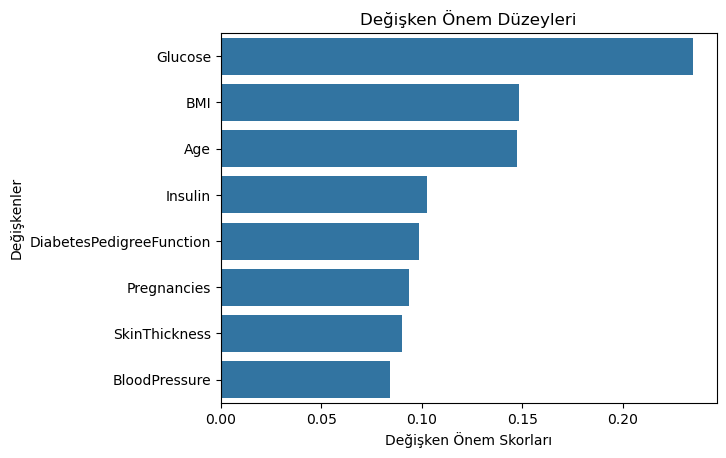

In [71]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()